In [120]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats import diagnostic as diag
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('C:/Local/python-training/Day-7/wine.csv', sep=',')
raw = df
raw.columns = raw.columns.str.replace('[@*#]', '', regex=True)
raw.columns = raw.columns.str.strip()
raw.isnull().sum()

colWithSpec = []
for x in list(raw.columns):
  if raw[x].dtypes == 'object':
    colWithSpec.append(x)
print(colWithSpec)

for x in colWithSpec:
  raw[x].replace('[@*#]', numpy.nan, regex=True, inplace=True)

raw.isna().sum()
raw.dropna(inplace=True)
raw.isna().sum()

a = ['Ash', 'phenols', 'Nonflavanoid_phenols']
for x in a:
  raw[x] = raw[x].astype(float)
raw.customer_segment = raw.customer_segment.str.upper().map({
    'ONE': 1,
    '1': 1,
    'TWO': 2,
    '2': 2,
    'THREE': 3,
    '3': 3
})
df = raw

['Ash', 'phenols', 'Nonflavanoid_phenols', 'customer_segment']


In [121]:
list1 = list(df.columns)

print("shape of dataframe before removal of Outlier ", df.shape)
for x in list1:
    mean = df[x].mean()
    sd = numpy.std(df[x])
    upper_limit = mean + 3*sd
    lower_limt = mean - 3*sd
    new_df = pd.DataFrame()
    new_df = df[(df[x] >= upper_limit) | (df[x] <= lower_limt)]
    if len(new_df)>0:
        print("Outlier is there in the column ", x)
        df = df[(df[x] < upper_limit) & (df[x] > lower_limt)]
        print("Removed outlier from column ", x)
    else:
        print("There is no outlier in the column ", x)
    print("----------------------------------------------------------")
print("shape of dataframe after removal of Outlier ", df.shape)

shape of dataframe before removal of Outlier  (176, 14)
There is no outlier in the column  Alcohol
----------------------------------------------------------
Outlier is there in the column  Malic acid
Removed outlier from column  Malic acid
----------------------------------------------------------
Outlier is there in the column  Ash
Removed outlier from column  Ash
----------------------------------------------------------
Outlier is there in the column  Alcalinity
Removed outlier from column  Alcalinity
----------------------------------------------------------
Outlier is there in the column  Magnesium
Removed outlier from column  Magnesium
----------------------------------------------------------
Outlier is there in the column  phenols
Removed outlier from column  phenols
----------------------------------------------------------
Outlier is there in the column  Flavanoids
Removed outlier from column  Flavanoids
----------------------------------------------------------
There is no 

In [122]:
import statsmodels.formula.api as smf

model = smf.ols(formula= 'customer_segment ~ Alcohol+Ash+Alcalinity+Magnesium+phenols+Flavanoids+Nonflavanoid_phenols+Proanthocyanins+Color_intensity+Hue+OD280+Proline', data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       customer_segment   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     126.3
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           6.88e-73
Time:                        10:34:43   Log-Likelihood:                 3.8930
No. Observations:                 166   AIC:                             18.21
Df Residuals:                     153   BIC:                             58.67
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.6160      0.509      9.064      0.000       3.610       5.622
Alcohol                 -0.0801      0.037     -2.158      0.032      -0.153      -0.007
Ash                     -0.0517      0.107     -0.482      0.630      -0.263       0.160
Alcalinity               0.0274      0.009      2.958      0.004       0.009       0.046
Magnesium               -0.0042      0.002     -2.163      0.032      -0.008      -0.000
phenols                  0.1818      0.066      2.773      0.006       0.052       0.311
Flavanoids              -0.4633      0.058     -7.972      0.000      -0.578      -0.349
Nonflavanoid_phenols    -0.4682      0.207     -2.266      0.025      -0.876      -0.060
Proanthocyanins          0.0809      0.054      1.511      0.133      -0.025       0.187
Color_intensity          0.0714      0.015      4.635      0.000       0.041       0.102
Hue                     -0.2061      0.131     -1.568      0.119      -0.466       0.054
OD280                   -0.2758      0.052     -5.278      0.000      -0.379      -0.173
Proline                 -0.0007      0.000     -6.862      0.000      -0.001      -0.000
==============================================================================
Omnibus:                        1.341   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.511   Jarque-Bera (JB):                1.200
Skew:                          -0.028   Prob(JB):                        0.549
Kurtosis:                       2.587   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

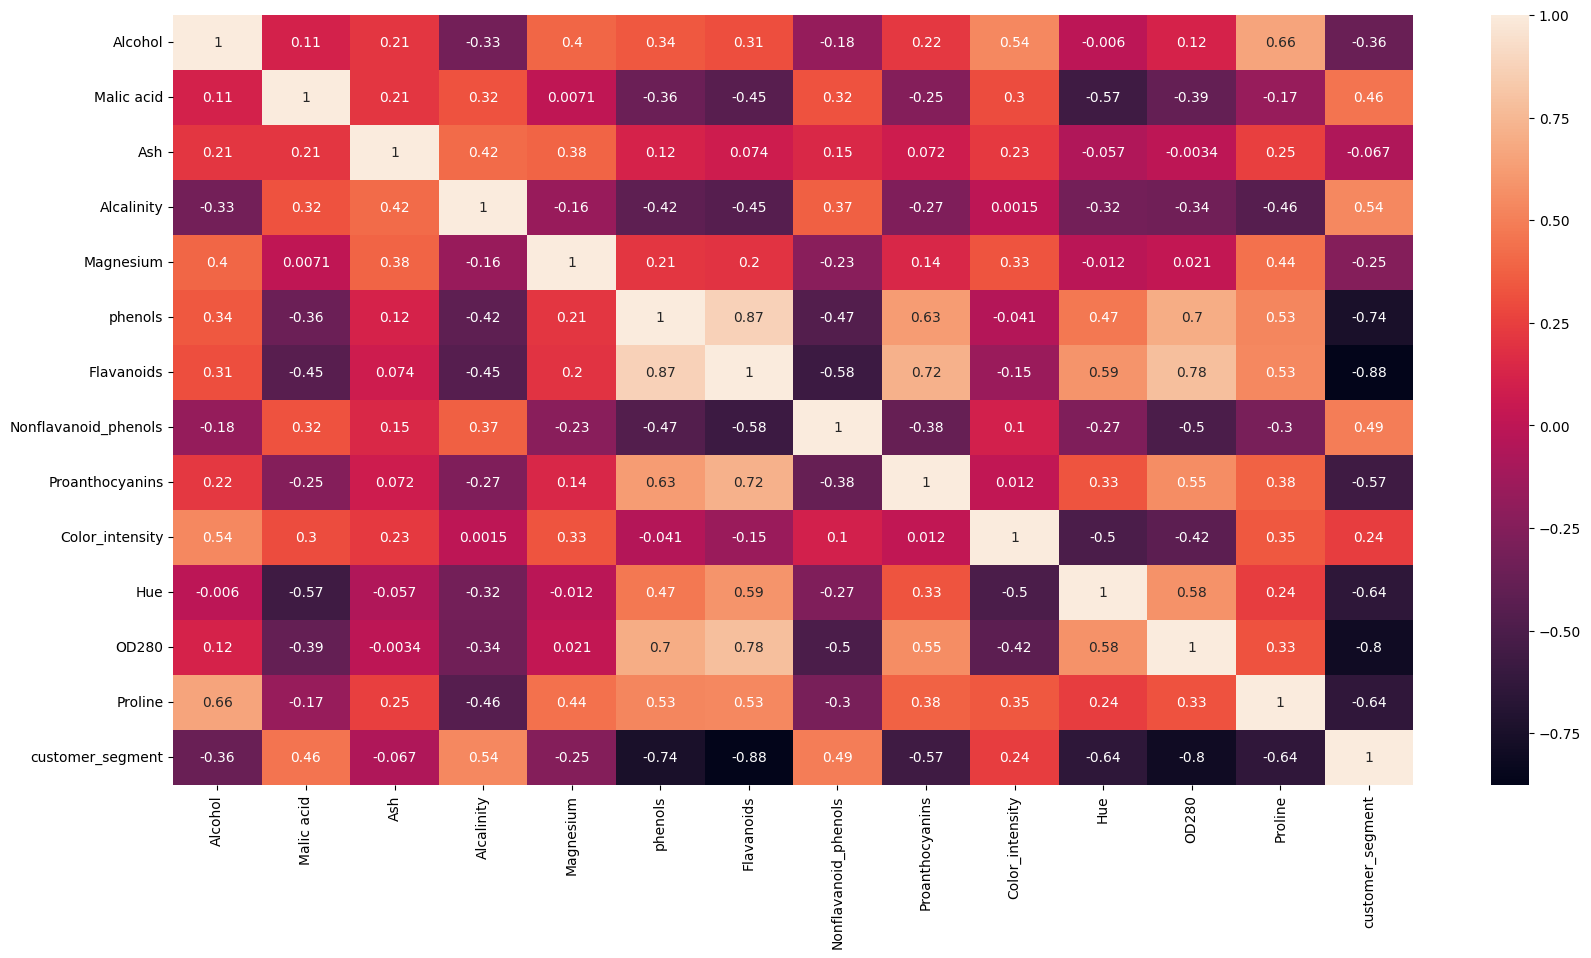

In [123]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, cbar = True)
plt.show()

In [124]:
X = df.drop('customer_segment', axis = 1)
Y = df['customer_segment']
#sc = StandardScaler()
#X = sc.fit_transform(X)

In [125]:
X.shape

(166, 13)

In [126]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)

In [127]:
train_x_lda, test_x_lda, train_y_lda, test_y_lda = train_test_split(X, Y, random_state=3, test_size=0.3)
print(train_x_lda.shape)
print(test_x_lda.shape)
print(train_y_lda.shape)
print(test_y_lda.shape)

(116, 13)
(50, 13)
(116,)
(50,)


In [128]:
train_x_lda = lda.fit_transform(train_x_lda, train_y_lda)
test_x_lda = lda.transform(test_x_lda)

In [129]:
model = LogisticRegression()
model.fit(train_x_lda, train_y_lda)
pv = model.predict(test_x_lda)
print('Accuracy score is : ', accuracy_score(pv, test_y_lda))
print('Confusion Matrix is')
confusion_matrix(pv, test_y_lda)

Accuracy score is :  1.0
Confusion Matrix is


array([[21,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 10]], dtype=int64)

In [150]:
model.coef_
model.intercept_

array([-0.05694446,  0.12413447, -0.06719001])

In [130]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state=3, test_size=0.3)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(116, 13)
(50, 13)
(116,)
(50,)


In [131]:
model = LogisticRegression()
model.fit(train_x, train_y)
pv = model.predict(test_x)
print('Accuracy score is : ', accuracy_score(pv, test_y))
print('Confusion Matrix is')
confusion_matrix(pv, test_y)


Accuracy score is :  0.92
Confusion Matrix is


c:\Users\SESA509164\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[19,  2,  0],
       [ 2, 17,  0],
       [ 0,  0, 10]], dtype=int64)

In [132]:
model_dt = DecisionTreeClassifier()
model_dt.fit(train_x, train_y)
pv = model_dt.predict(test_x)
print('Accuracy score is : ', accuracy_score(pv, test_y))
print('Confusion Matrix is')
confusion_matrix(pv, test_y)

Accuracy score is :  0.88
Confusion Matrix is


array([[19,  1,  1],
       [ 2, 17,  1],
       [ 0,  1,  8]], dtype=int64)

In [133]:
print(model_dt.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.39436727 0.         0.         0.09258012 0.         0.07210567
 0.44094693]


In [134]:
test_x.columns

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity', 'Magnesium', 'phenols',
       'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
       'Color_intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [135]:
features = list(test_x.columns)
feature_importances = model_dt.feature_importances_
impotances = [(f, round(imp, 2)) for f, imp in zip(features, feature_importances)]
impotances = sorted(impotances, key = lambda x:x[1], reverse=True)
impotances

[('Proline', 0.44),
 ('Flavanoids', 0.39),
 ('Color_intensity', 0.09),
 ('OD280', 0.07),
 ('Alcohol', 0.0),
 ('Malic acid', 0.0),
 ('Ash', 0.0),
 ('Alcalinity', 0.0),
 ('Magnesium', 0.0),
 ('phenols', 0.0),
 ('Nonflavanoid_phenols', 0.0),
 ('Proanthocyanins', 0.0),
 ('Hue', 0.0)]

In [136]:
list1 = ['Proline','Flavanoids','Color_intensity','OD280']

In [137]:
new_train_x = train_x[list1]
new_test_x = test_x[list1]

In [138]:
model_dt_new = DecisionTreeClassifier()
model_dt_new.fit(new_train_x, train_y)
pv_new = model_dt_new.predict(new_test_x)
print('Accuracy score is : ', accuracy_score(pv_new, test_y))
print('Confusion Matrix is')
confusion_matrix(pv_new, test_y)

Accuracy score is :  0.9
Confusion Matrix is


array([[19,  1,  0],
       [ 2, 17,  1],
       [ 0,  1,  9]], dtype=int64)

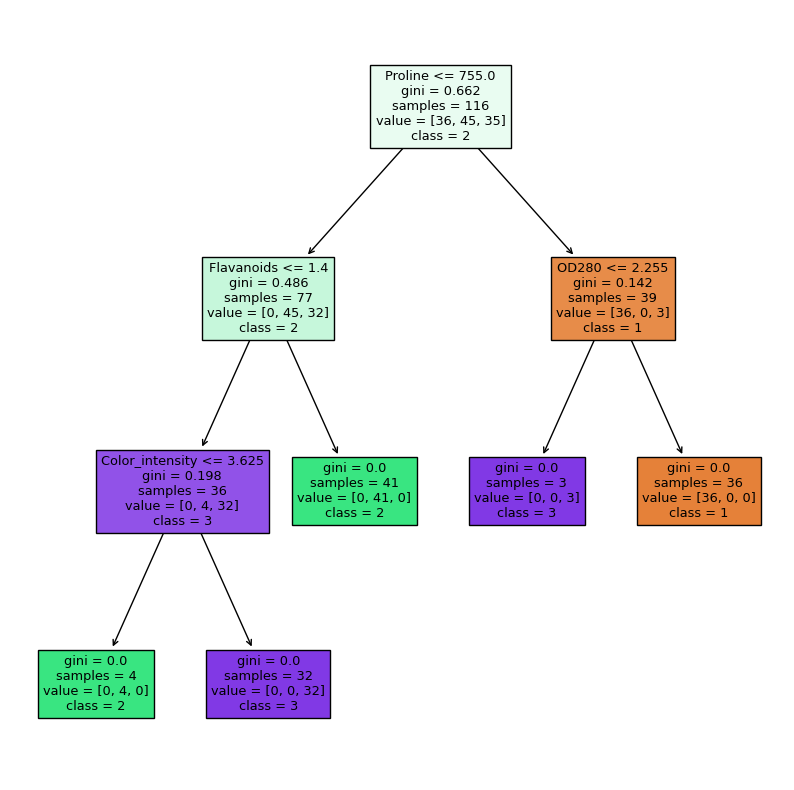

In [139]:
from sklearn import tree

plt.figure(figsize=(10,10))
features = df.columns
classes = ['1','2','3']
tree.plot_tree(model_dt,feature_names=features,class_names=classes,filled=True)

plt.show()

In [140]:
test_x.shape[1]

13

In [141]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = test_x.shape[1]**2)
model_rf.fit(train_x, train_y)
pv = model_rf.predict(test_x)
print("accuracy of the model is ", accuracy_score(test_y, pv))
print("feature importances are ", model_rf.feature_importances_)

accuracy of the model is  0.96
feature importances are  [0.08115367 0.03773965 0.0116289  0.01603892 0.03337056 0.04772748
 0.16832308 0.01613952 0.02858404 0.12950839 0.08618953 0.1103053
 0.23329094]


In [142]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(train_x, train_y)
nb_pv = model_nb.predict(test_x)
print("accuracy of the model is ", accuracy_score(test_y, nb_pv))

accuracy of the model is  0.96


In [143]:
for x in range(150, 200, 2):
    model_rf = RandomForestClassifier(n_estimators = x)
    model_rf.fit(train_x, train_y)
    pv = model_rf.predict(test_x)
    print("accuracy of the model of ", x, " tree ", accuracy_score(test_y, pv))


accuracy of the model of  150  tree  0.96
accuracy of the model of  152  tree  0.96
accuracy of the model of  154  tree  0.98
accuracy of the model of  156  tree  0.98
accuracy of the model of  158  tree  0.96
accuracy of the model of  160  tree  0.96
accuracy of the model of  162  tree  0.94
accuracy of the model of  164  tree  0.96
accuracy of the model of  166  tree  0.96
accuracy of the model of  168  tree  0.96
accuracy of the model of  170  tree  0.96
accuracy of the model of  172  tree  0.96
accuracy of the model of  174  tree  0.96
accuracy of the model of  176  tree  0.98
accuracy of the model of  178  tree  0.96
accuracy of the model of  180  tree  0.96
accuracy of the model of  182  tree  0.96
accuracy of the model of  184  tree  0.96
accuracy of the model of  186  tree  0.96
accuracy of the model of  188  tree  0.96
accuracy of the model of  190  tree  0.96
accuracy of the model of  192  tree  0.96
accuracy of the model of  194  tree  0.96
accuracy of the model of  196  tre

In [144]:
# Steps to follow : try not to hardcode column names the code should be generic so that if you supply any other data set it should run well.
# 1. Check df.shape
# 2. Check df.columns
# 3. Check df.dtypes
# 4. Remove special chars from column names
# 5. Remove leading and trailing spaces from colmun names
# 6. Remove rows where special chars are present
# 7. Convert catagorical dependent variable to numbers
# 7.1 Use 3sd technique to remove outliers (do not blindly delete it, check if it really is an outlier)
# 8. Check the count of missing vallues in the colmuns
# 9. Check the missing vlaue ratio in every column
# 10. If the missing value ratio is >=0.3 delete the column
# 11. If the missing value ratio is <0.3 then impute the missing value to the maximum occuring value of that column
# 12. Find the variance of each column, if var<0.1 then delete the column
# 13. Find the correlation between independent variables
# 14. If the correlation is > 0.8 then delete all of them except 1 (Do not manually delete the columns, hint: use numpy.diag)
# 15. Plot a bar chart of dependent var count of categories and check if data is balanced or unbalanced. (hint : use sns.countplot)
# 16. If data is balanced, we use accuracy score otherwise use f1 score
# 17. Check dtypes will show all the columns are float or int
# 18. Check if the data points are in same scale or not in not use standardscaler to scale them (remove dependent var in scale)
# 19. Split the data into training and testing, implement logistic regression, decision tree and random forest
# 20. Check the feature importances in decision tree and random forest and try to increase the accuracy
# 21. If the accuracy is < 0.9 find out the reason why it is less

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# n-estimators = number of trees created
# cv = 5 crossvalidation : 20% test and 80% train 5 times
# out of 5, 1 RF is selected, which has best accuracy 
param_grid = {
    'n_estimators' : [200, 220, 230, 240, 250, 500]
}

CV_rfc = GridSearchCV(param_grid=param_grid, cv=5, estimator=model_rf)
CV_rfc.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=198),
             param_grid={'n_estimators': [200, 220, 230, 240, 250, 500]})

In [146]:
CV_rfc.best_params_

{'n_estimators': 220}

In [147]:
rf_grid = {"n_estimators": numpy.arange(10, 100, 1)}
rs_model = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)
# fit
rs_model.fit(train_x, train_y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=2,
                   param_distributions={'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])},
                   verbose=True)

In [148]:
rs_model.best_params_

{'n_estimators': 56}